<a href="https://colab.research.google.com/github/kaylamalherbe/Persephone-Green/blob/main/CSSE4011_final_project%2BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want a series of data as an input and then a prediction for the series being an action. So we take the raw_data from the csv which only one one time stamp and ocnvert it into a csv which combined a predetermined window size data set.

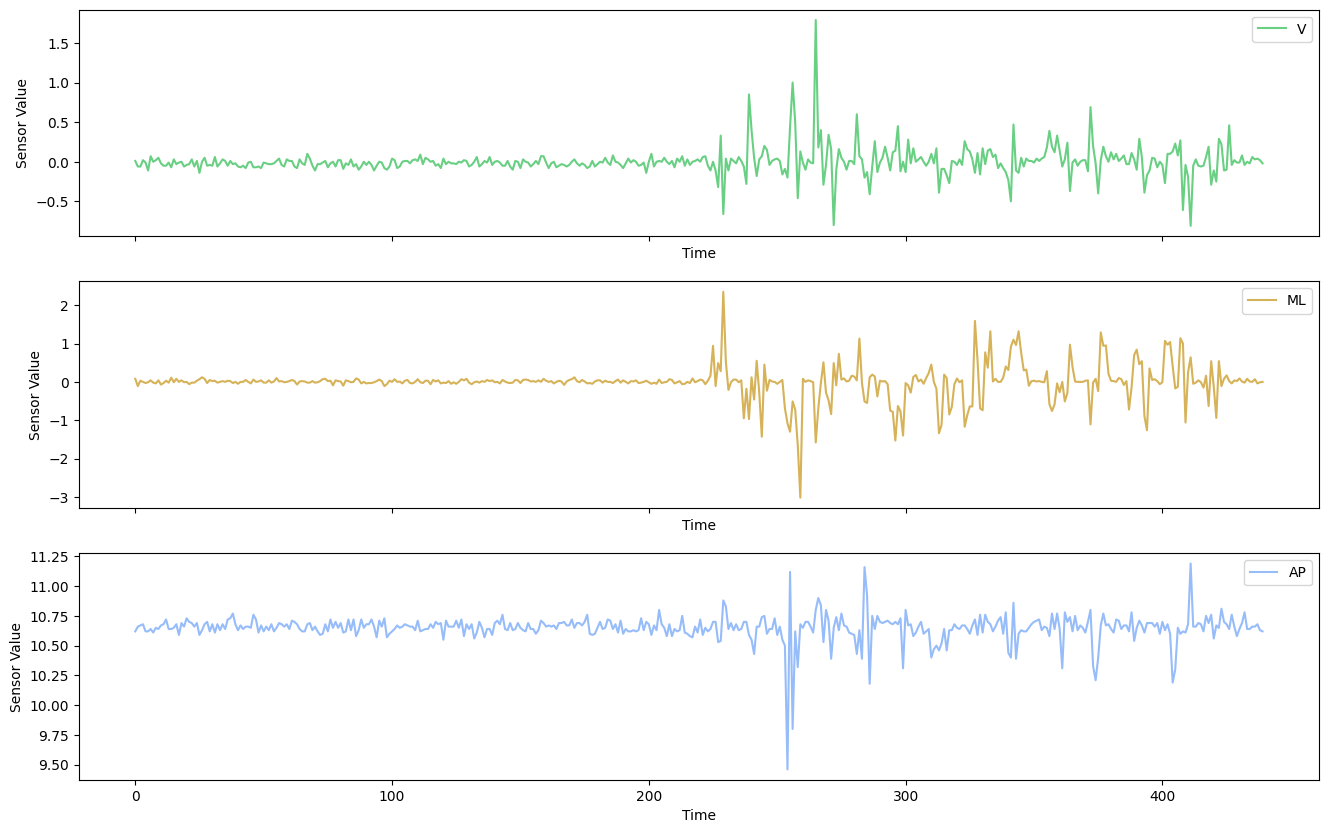

0      0.01
1     -0.06
2     -0.06
3      0.02
4     -0.01
       ... 
424   -0.11
425   -0.10
426    0.46
427   -0.04
428    0.02
Name: Ax, Length: 429, dtype: float64
1     -0.06
2     -0.06
3      0.02
4     -0.01
5     -0.11
       ... 
424   -0.11
425   -0.10
426    0.46
427   -0.04
428    0.02
Name: Ax, Length: 428, dtype: float64


In [43]:
#Applying example code to acceleromotor code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# load in test data set
csv = "raw_data.csv"
sensor_data = pd.read_csv(csv)

#plot different sensor output to see movement
plt.subplots(3, 1, sharex='col', sharey='row', figsize=(16,10))

plt.subplot(3, 1, 1)
plt.plot(sensor_data['Ax'], color='#69cf83', label='V')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sensor_data['Ay'], color='#d6b258', label='ML')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sensor_data['Az'], color='#96bcfa', label='AP')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.show()
# print(sensor_data['Ax'][0:-11])
# print(sensor_data['Ax'][1:-11])

# Create new df based on input data to apply windowing
window = 24
df = pd.DataFrame()
df['Category'] = sensor_data['Category'][(window-1):]
col = 1
while col <= window:
  df['Ax_' + str(col)] = sensor_data['Ax'][(col-1):-(window -  1)]
  df['Ay_' + str(col)] = sensor_data['Ay'][(col-1):-(window -  1)]
  df['Az_' + str(col)] = sensor_data['Az'][(col-1):-(window -  1)]
  df['Gx_' + str(col)] = sensor_data['Gx'][(col-1):-(window -  1)]
  df['Gy_' + str(col)] = sensor_data['Gy'][(col-1):-(window -  1)]
  df['Gz_' + str(col)] = sensor_data['Gz'][(col-1):-(window -  1)]
  col += 1

df.to_csv('test_train_data_wd' + str(window) + '.csv', index=False)


In [48]:
def window_data_set(window):
  # load in test data set
  csv = "raw_data.csv"
  sensor_data = pd.read_csv(csv)
  df = pd.DataFrame()
  df['Category'] = sensor_data['Category'][(window-1):]
  col = 1
  while col <= window:
    df['Ax_' + str(col)] = sensor_data['Ax'][(col-1):-(window -  1)]
    df['Ay_' + str(col)] = sensor_data['Ay'][(col-1):-(window -  1)]
    df['Az_' + str(col)] = sensor_data['Az'][(col-1):-(window -  1)]
    df['Gx_' + str(col)] = sensor_data['Gx'][(col-1):-(window -  1)]
    df['Gy_' + str(col)] = sensor_data['Gy'][(col-1):-(window -  1)]
    df['Gz_' + str(col)] = sensor_data['Gz'][(col-1):-(window -  1)]
    col += 1

  df.to_csv('test_train_data_wd' + str(window) + '.csv', index=False)

In [47]:
#Applying example code to acceleromotor code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# load in test data set
# this is the one with window size 24
csv = "test_train_data.csv"
sensor_data = pd.read_csv(csv)
# shuffle data order
from sklearn.utils import shuffle
sensor_data = shuffle(sensor_data)

# Drop rows with missing 'Category' values
# sensor_data = sensor_data.dropna(subset=['Category'])

# Categories 0 is no move, 1 is move

# # Drop rows with missing 'Category' values
sensor_data = sensor_data.dropna(subset=['Category'])
# # 0 is no move, 1 is move

X, y = sensor_data.iloc[:, 1:], sensor_data.iloc[:, :1]
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Split data into training and testing sets

X_train.shape, y_train.shape

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Sample prediction
sample = X_test.iloc[0:1]  # Keep as DataFrame to match model input format
prediction = rf_classifier.predict(sample)

# Retrieve and display the sample
sample_dict = sample.iloc[0].to_dict()
print(f"\nSample: {sample_dict}")
print(f"Predicted: {'Move' if prediction[0] == 1 else 'No movement'}")

# view the feature scores

feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Scores")
print(feature_scores)

import joblib
joblib.dump(rf_classifier, "./random_forest_series_data_train.joblib")

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        80
           1       0.94      0.71      0.81        62

    accuracy                           0.85       142
   macro avg       0.87      0.84      0.84       142
weighted avg       0.87      0.85      0.85       142


Sample: {'Ax_1': -0.05, 'Ay_1': 0.0, 'Az_1': 10.64, 'Gx_1': 0.27, 'Gy_1': 0.06, 'Gz_1': -0.14, 'Ax_2': -0.05, 'Ay_2': 0.0, 'Az_2': 10.64, 'Gx_2': 0.27, 'Gy_2': 0.06, 'Gz_2': -0.14, 'Ax_3': -0.05, 'Ay_3': 0.0, 'Az_3': 10.64, 'Gx_3': 0.27, 'Gy_3': 0.06, 'Gz_3': -0.14, 'Ax_4': -0.05, 'Ay_4': 0.0, 'Az_4': 10.64, 'Gx_4': 0.27, 'Gy_4': 0.06, 'Gz_4': -0.14, 'Ax_5': -0.05, 'Ay_5': 0.0, 'Az_5': 10.64, 'Gx_5': 0.27, 'Gy_5': 0.06, 'Gz_5': -0.14, 'Ax_6': -0.05, 'Ay_6': 0.0, 'Az_6': 10.64, 'Gx_6': 0.27, 'Gy_6': 0.06, 'Gz_6': -0.14, 'Ax_7': -0.05, 'Ay_7': 0.0, 'Az_7': 10.64, 'Gx_7': 0.27, 'Gy_7': 0.06, 'Gz_7': -0.14, 'Ax_8': -0.05, 'Ay_8'

['./random_forest_series_data_train.joblib']

In [40]:
# Analysis:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


Confusion matrix

 [[61  7]
 [15 59]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        68
           1       0.89      0.80      0.84        74

    accuracy                           0.85       142
   macro avg       0.85      0.85      0.85       142
weighted avg       0.85      0.85      0.84       142



Things to consider doing:
adding std, adding mean and other surrounding elements
looking into random forest parameters
larger dataset
more categories
Adding delta:




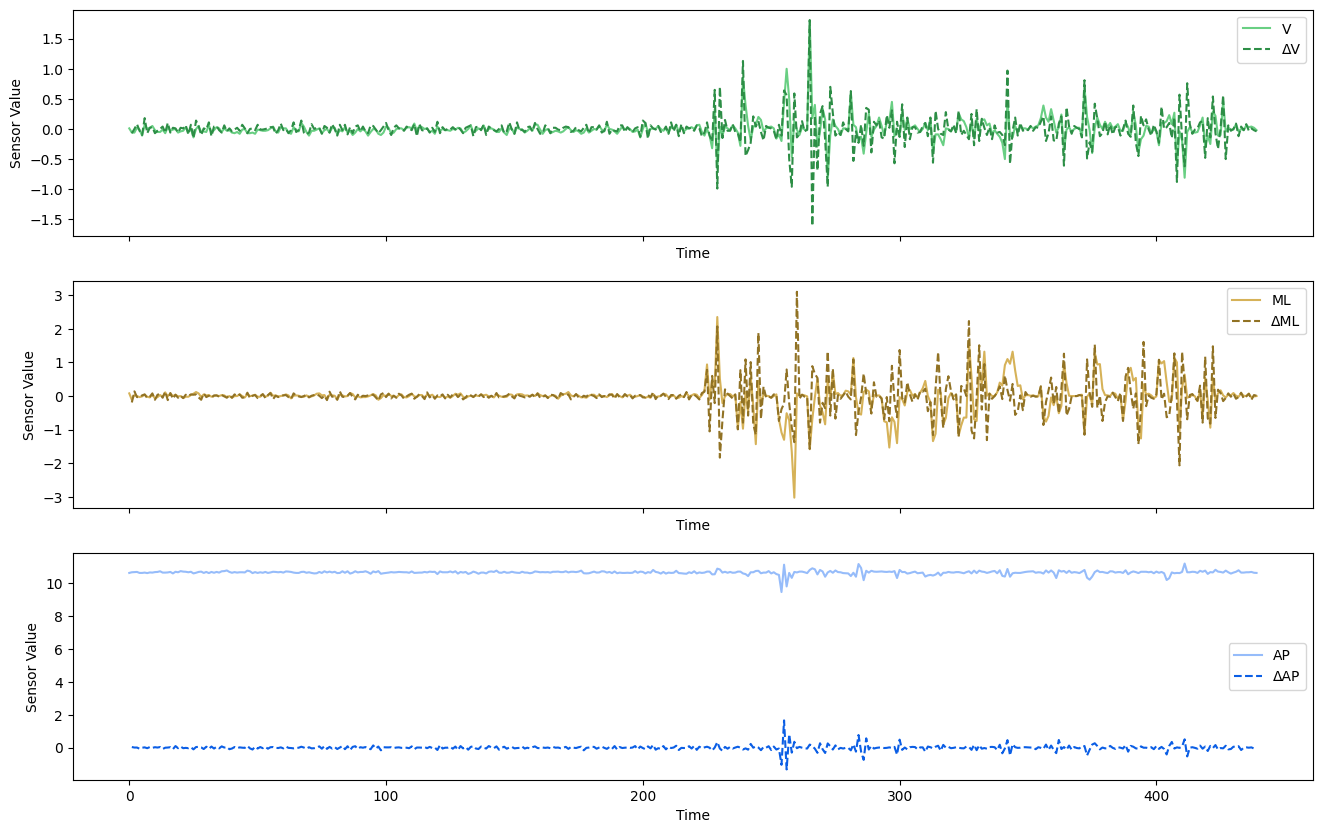

In [28]:
#plotting accelerometer data and its delta
csv = "raw_data.csv"
sensor_data = pd.read_csv(csv)
plt.subplots(3, 1, sharex='col', sharey='row', figsize=(16,10))
V = sensor_data['Ax']
ML = sensor_data['Ay']
AP = sensor_data['Az']
plt.subplot(3, 1, 1)
plt.plot(V, color='#69cf83', label='V')
plt.plot(V.diff(), color='#2d8e46', linestyle='dashed', label='ΔV')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ML, color='#d6b258', label='ML')
plt.plot(ML.diff(), color='#917224', linestyle='dashed', label='ΔML')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(AP, color='#96bcfa', label='AP')
plt.plot(AP.diff(), color='#0b5ee5', linestyle='dashed', label='ΔAP')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

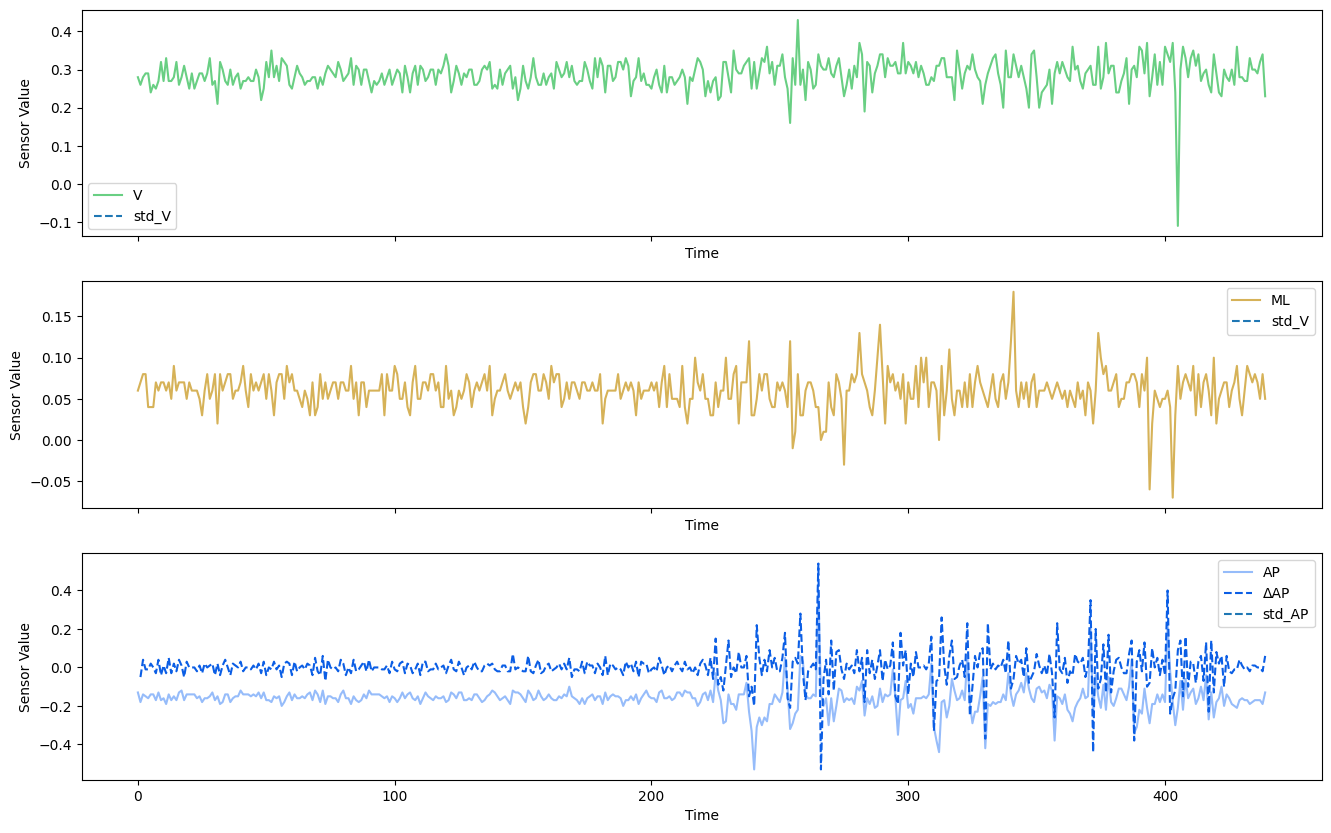

In [31]:
#plotting gyroscope data and its delta
csv = "raw_data.csv"
sensor_data = pd.read_csv(csv)
plt.subplots(3, 1, sharex='col', sharey='row', figsize=(16,10))
V = sensor_data['Gx']
ML = sensor_data['Gy']
AP = sensor_data['Gz']
plt.subplot(3, 1, 1)
plt.plot(V, color='#69cf83', label='V')
plt.plot(V.diff(), color='#2d8e46', linestyle='dashed', label='ΔV')
# plt.plot(V.std(), linestyle='dashed', label='std_V')

plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ML, color='#d6b258', label='ML')
plt.plot(ML.diff(), color='#917224', linestyle='dashed', label='ΔML')
# plt.plot(ML.std(), linestyle='dashed', label='std_V')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(AP, color='#96bcfa', label='AP')
plt.plot(AP.diff(), color='#0b5ee5', linestyle='dashed', label='ΔAP')
# plt.plot(AP.std(), linestyle='dashed', label='std_AP')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

Exploring different Window sizes

In [52]:
# Exploring diff window sizes:
#Applying example code to acceleromotor code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
windows = [10, 20, 24, 50, 64, 128]
for window in windows:
  window_data_set(window)
  # load in test data set
  # this is the one with window size 24
  csv = "test_train_data_wd" + str(window) + ".csv"
  sensor_data = pd.read_csv(csv)
  # shuffle data order
  from sklearn.utils import shuffle
  sensor_data = shuffle(sensor_data)

  # Drop rows with missing 'Category' values
  # sensor_data = sensor_data.dropna(subset=['Category'])

  # Categories 0 is no move, 1 is move

  # # Drop rows with missing 'Category' values
  sensor_data = sensor_data.dropna(subset=['Category'])
  # # 0 is no move, 1 is move

  X, y = sensor_data.iloc[:, 1:], sensor_data.iloc[:, :1]
  # print(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  # Split data into training and testing sets

  X_train.shape, y_train.shape

  # Initialize RandomForestClassifier
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

  # Fit the classifier to the training data
  rf_classifier.fit(X_train, y_train)

  # Make predictions
  y_pred = rf_classifier.predict(X_test)

  # Calculate accuracy and classification report
  accuracy = accuracy_score(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)

  # Print the results
  print("Trial Window Size: ", window)
  print(f"Accuracy: {accuracy:.2f}")
  print("\nClassification Report:\n", classification_rep)

  # Sample prediction
  sample = X_test.iloc[0:1]  # Keep as DataFrame to match model input format
  prediction = rf_classifier.predict(sample)

  # Retrieve and display the sample
  sample_dict = sample.iloc[0].to_dict()
  print(f"\nSample: {sample_dict}")
  print(f"Predicted: {'Move' if prediction[0] == 1 else 'No movement'}")

  # view the feature scores

  feature_scores = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
  # print("Feature Scores")
  # print(feature_scores)

  import joblib
  joblib.dump(rf_classifier, "./random_forest_series_data_train_wd" + str(window) +".joblib")

Trial Window Size:  10
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        70
           1       0.88      0.73      0.80        73

    accuracy                           0.81       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.81      0.81       143


Sample: {'Ax_1': 0.1, 'Ay_1': -0.02, 'Az_1': 10.68, 'Gx_1': 0.27, 'Gy_1': 0.03, 'Gz_1': -0.13, 'Ax_2': 0.1, 'Ay_2': -0.02, 'Az_2': 10.68, 'Gx_2': 0.27, 'Gy_2': 0.03, 'Gz_2': -0.13, 'Ax_3': 0.1, 'Ay_3': -0.02, 'Az_3': 10.68, 'Gx_3': 0.27, 'Gy_3': 0.03, 'Gz_3': -0.13, 'Ax_4': 0.1, 'Ay_4': -0.02, 'Az_4': 10.68, 'Gx_4': 0.27, 'Gy_4': 0.03, 'Gz_4': -0.13, 'Ax_5': 0.1, 'Ay_5': -0.02, 'Az_5': 10.68, 'Gx_5': 0.27, 'Gy_5': 0.03, 'Gz_5': -0.13, 'Ax_6': 0.1, 'Ay_6': -0.02, 'Az_6': 10.68, 'Gx_6': 0.27, 'Gy_6': 0.03, 'Gz_6': -0.13, 'Ax_7': 0.1, 'Ay_7': -0.02, 'Az_7': 10.68, 'Gx_7': 0.27, 'Gy_7': 0.03, 'Gz_7': -0.13